## About Data
Dataset contains customers information for customer churn prediction and having below columns. 
Customer ID : 
Unique Identifier for each customer like primary key.
#### Name : 
Customer name.
#### Age :
Age of Customer.
#### Gender :
Gender of the customer 
#### Location : 
location of the customer including Houston,Los,Angeles,Miami,Chicago and New York.
#### Subscription_Length_Months:
how many months the customer has been subscribed.
#### Monthly_Bill: 
monthly Bill amount of Customer.
#### otal_Usage_GB:
Total usage in gigabytes.
#### Churn : 
A Binary indicator (1 or 0) Reprensenting the customer Churned (1)or Not (0)

In [1]:
# Importing Libraries 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### 1) Data Preprocessing : 

In [2]:
#Loading data
df=pd.read_excel(r"D:\datasets\customer_churn_large_dataset.xlsx")

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


#### Variables has proper data types 

In [7]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

#### No null value in the dataset 

In [8]:
df.duplicated().sum()

0

#### No duplicat values in dataset 

In [9]:
# statistical info of all numerical variables 
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [10]:
# statistical info of categorical variables 
df.describe(include=['object'])

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [11]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

#### The dataset includes 5 locations 

In [12]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

##### dataset includes more Females (50216) than male (49784)

In [13]:
df.corr()

C:\Users\sopan\AppData\Local\Temp\ipykernel_15960\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


C:\Users\sopan\AppData\Local\Temp\ipykernel_15960\2314021413.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


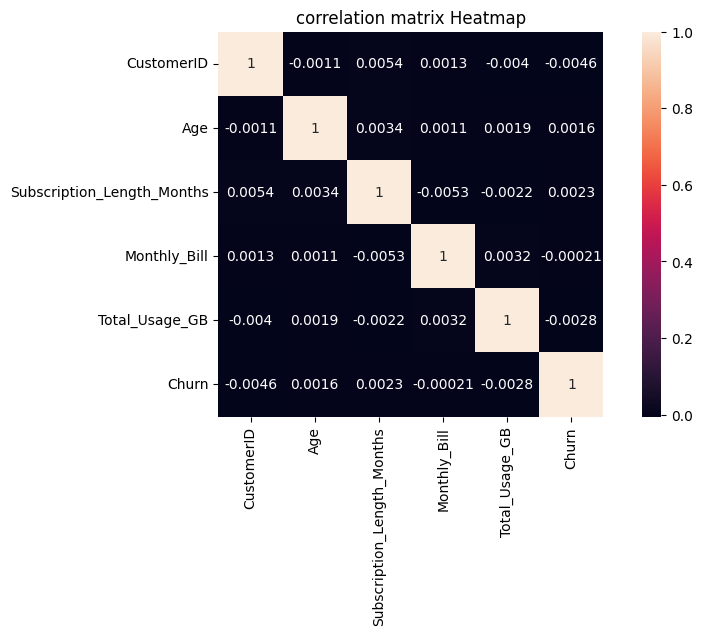

In [14]:
corr_matrix=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,square=True)
plt.title('correlation matrix Heatmap')
plt.show()

### as we observe : each column has no llinear relationship with each other becous all is less than -0.0055.

In [15]:
df.drop(columns=['CustomerID','Name'],axis=1,inplace=True)


In [16]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

### Removed CustomerID and Name column becous they are irrelevant for analysis not left 6 variables

In [17]:
## checking dataset 
for column in df.columns :
    unique_values=df[column].unique()
    print(f"unicode Values in {column}: {unique_values}\n")

missing_values=df.isnull().sum()
print("missing values : ")
print(missing_values,'\n')

dupl=df.duplicated().sum()
print(f"duplicate values : {dupl} \n")

shp=df.shape
print(f"shape of data : {shp} \n")

dtp=df.dtypes
print(f"data type : {dtp}")

unicode Values in Age: [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]

unicode Values in Gender: ['Male' 'Female']

unicode Values in Location: ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']

unicode Values in Subscription_Length_Months: [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]

unicode Values in Monthly_Bill: [73.36 48.76 85.47 ... 75.21 41.98 83.55]

unicode Values in Total_Usage_GB: [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 257 196

#### Dataset has beeen clear 

## Outliers Checking 
* its important to find and remove unuseual data points also known as outliers.outliers can affect the model understanding of the data and predict the wrong prediction 

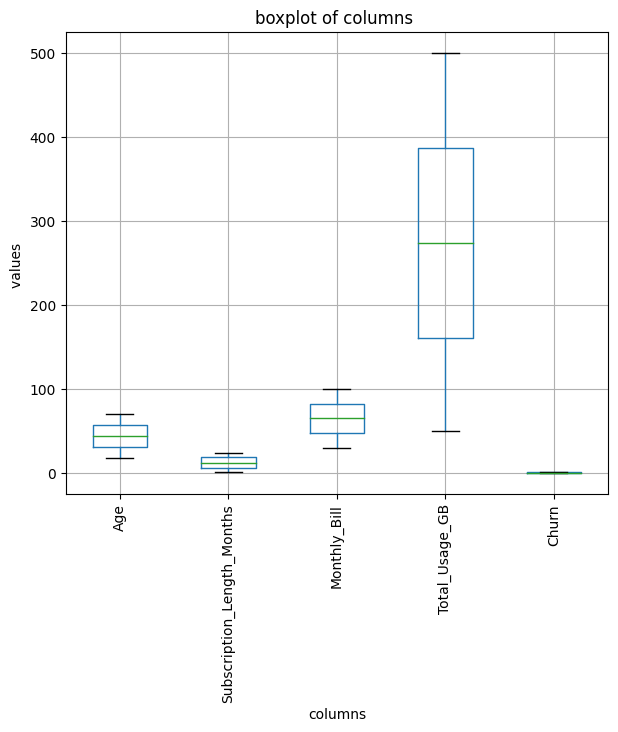

In [18]:
# adjust figure size based on the number of columns 
num_columns=len(df.columns)
fig,ax=plt.subplots(figsize=(10,6))
if num_columns > 16:
    fig.set_size_inches(10,num_columns*0.6)
else:
    fig.set_size_inches(num_columns,6)

#create boxplot for each column
df.boxplot(ax=ax)

#set title and labels 
plt.title('boxplot of columns ')
plt.xlabel('columns')
plt.ylabel('values ')
plt.xticks(rotation=90)
plt.show()


#### No outliers present in any variable 

In [19]:
# make copy of clean data 
df_clean=df.copy()


### Feature Encoding 
* its convert a categorical variable innto numerical variable that algorithm understand 

In [20]:
categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Location'], dtype='object')

In [21]:
df=pd.get_dummies(df,columns=['Gender','Location'],drop_first=True)

In [22]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


#### I apply One hot Encoding becouse both variables have less number of categories 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Subscription_Length_Months  100000 non-null  int64  
 2   Monthly_Bill                100000 non-null  float64
 3   Total_Usage_GB              100000 non-null  int64  
 4   Churn                       100000 non-null  int64  
 5   Gender_Male                 100000 non-null  uint8  
 6   Location_Houston            100000 non-null  uint8  
 7   Location_Los Angeles        100000 non-null  uint8  
 8   Location_Miami              100000 non-null  uint8  
 9   Location_New York           100000 non-null  uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 4.3 MB


#### data types of all variable is numerical now 

### Checking Distribution of data 
* By understanding the data distribution, we can choose appropriate strategies to handle imbalances, outliers, or other issues. This will ensure that our model works well across all scenarios and accurately represents the underlying patterns in the data.


In [24]:
df.shape

(100000, 10)

In [25]:
# select appropriate bin size 
import math

def sturges_rule(num_data_points):
    k= 1 + math.log2(num_data_points)
    return int(k)

num_data_points=100000
bins=sturges_rule(num_data_points)
print("number of bins according to sturges rule :",bins)

number of bins according to sturges rule : 17


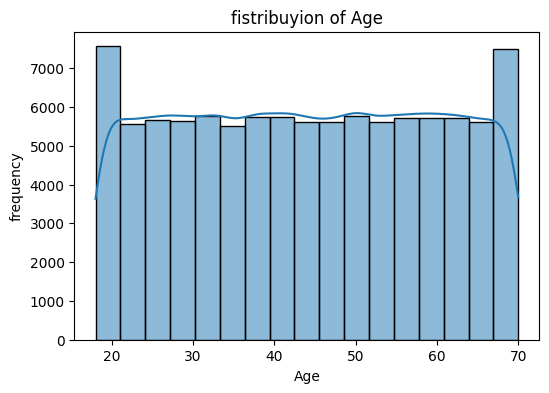

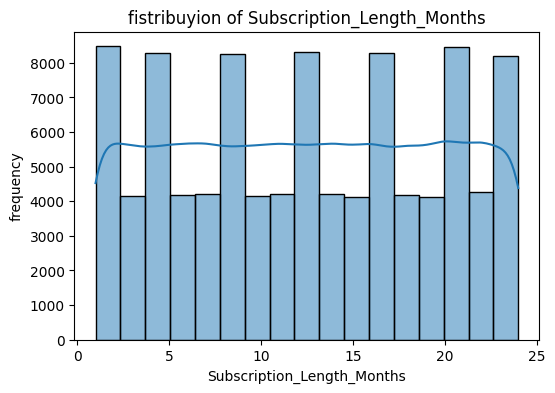

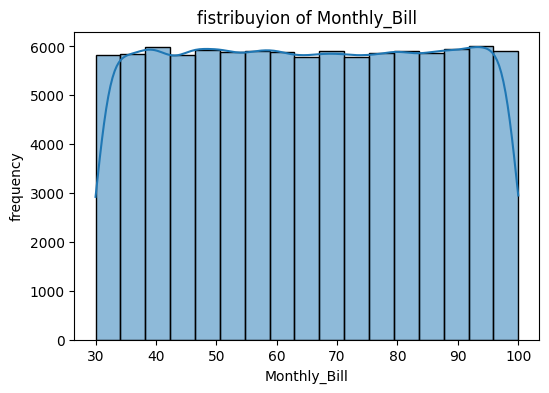

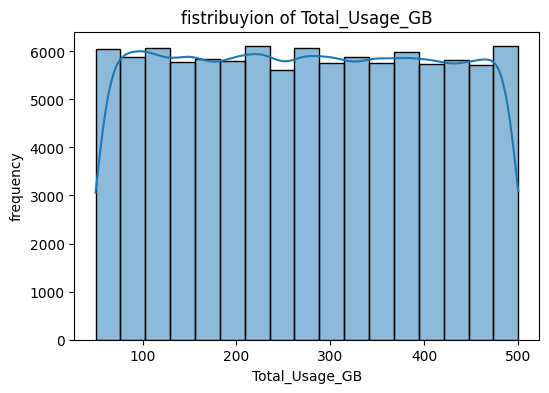

In [26]:
#checking distribution of all continuous variables 
continuous_vars=df.select_dtypes(include=['float64','int64']).columns

# exclude binary variable from the list 
binary_vars=[var for var in continuous_vars if df[var].nunique()==2]

# excludes binary variable from continuous variables 
continuous_vars=[var for var in continuous_vars if var not in binary_vars]


#ploting the distribution of each continuous variable 
for var in continuous_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df,x=var,bins=17,kde=True)
    plt.xlabel(var)
    plt.ylabel('frequency')
    
    plt.title(f"fistribuyion of {var}")
    plt.show()

In [27]:
# checkmall skewness of all continuous data 
df[continuous_vars].skew()


Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
dtype: float64

#### All variables normally distributed 

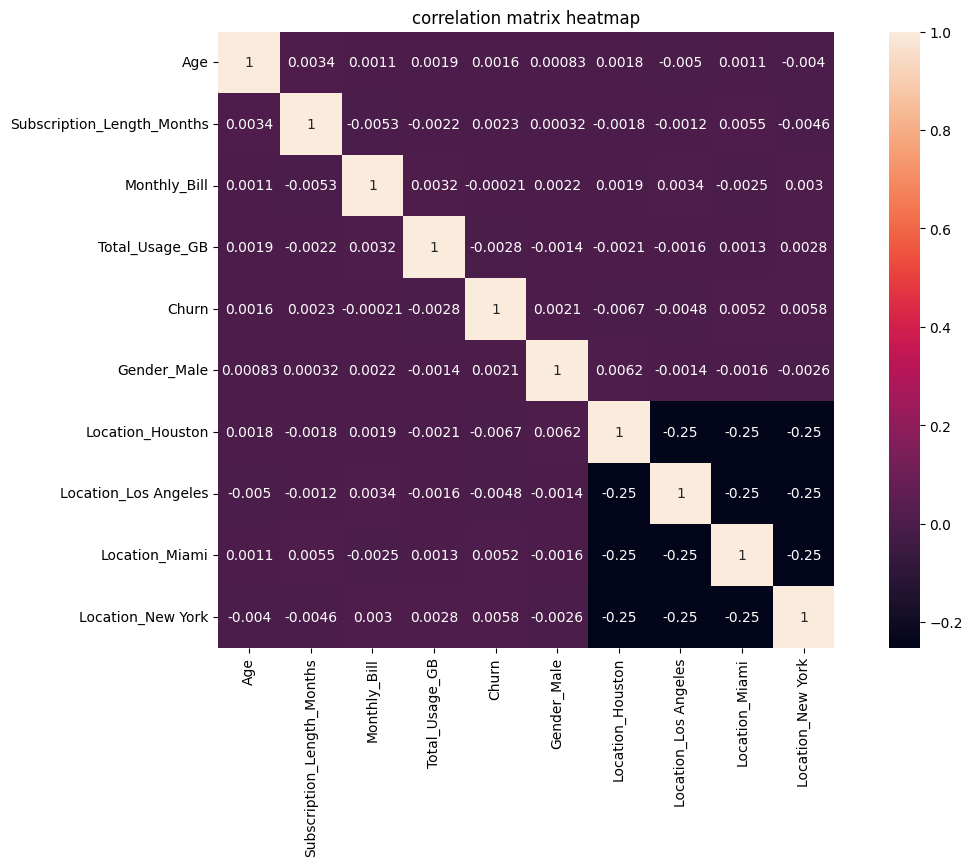

In [28]:
## checking colinearity between variables 
corr_matrix=df.corr()
plt.figure(figsize=(14,8))#width, height
sns.heatmap(corr_matrix,annot=True,square=True)
plt.title('correlation matrix heatmap')
plt.show()

#### no pair of variable is highly correlated.

## Spliting data into train and test set

In [29]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_train =train_test_split(x,y,test_size=0.3,random_state=42)


#### take 70% data for training and 30% for testing 

In [31]:
x_train.shape,y_train.shape

((70000, 9), (30000,))

## Feature Scaling 


In [32]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


In [33]:
columns_to_check= df.columns
columns_needs_to_be_scaled =[]
for column in columns_to_check:
    if(df[column] > 1).any() or (df[column]<0).any():
        columns_needs_to_be_scaled.append(column)

print("columns with value greter than 1 and less than 0 is : ")
print(columns_needs_to_be_scaled)

columns with value greter than 1 and less than 0 is : 
['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']


#### This four columns need scaling  ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'] . i decide to use minmax scalar becouse majority of variables is binary 

In [34]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale =['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

x_train[columns_to_scale] =scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

In [35]:
x_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
76513,0.134615,0.521739,0.973425,0.928889,1,0,1,0,0
60406,0.692308,0.043478,0.598657,0.740000,0,1,0,0,0
27322,0.269231,0.826087,0.509358,0.837778,1,0,0,0,0
53699,0.826923,0.478261,0.760109,0.031111,0,1,0,0,0
65412,1.000000,0.173913,0.170453,0.108889,0,0,0,0,1


In [36]:
x_test.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
75721,0.576923,0.434783,0.835548,0.982222,0,1,0,0,0
80184,0.596154,0.521739,0.151593,0.828889,1,0,0,0,1
19864,0.250000,0.173913,0.043006,0.502222,0,0,1,0,0
76699,0.673077,0.130435,0.923846,0.642222,1,0,0,0,1
92991,0.096154,1.000000,0.745964,0.564444,0,0,1,0,0


## Check for the class imbalance 
* in machine learning its important to check if the data is balanced or not . this is called class imbalanced 

In [37]:
class_count = df['Churn'].value_counts()
class_count

0    50221
1    49779
Name: Churn, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

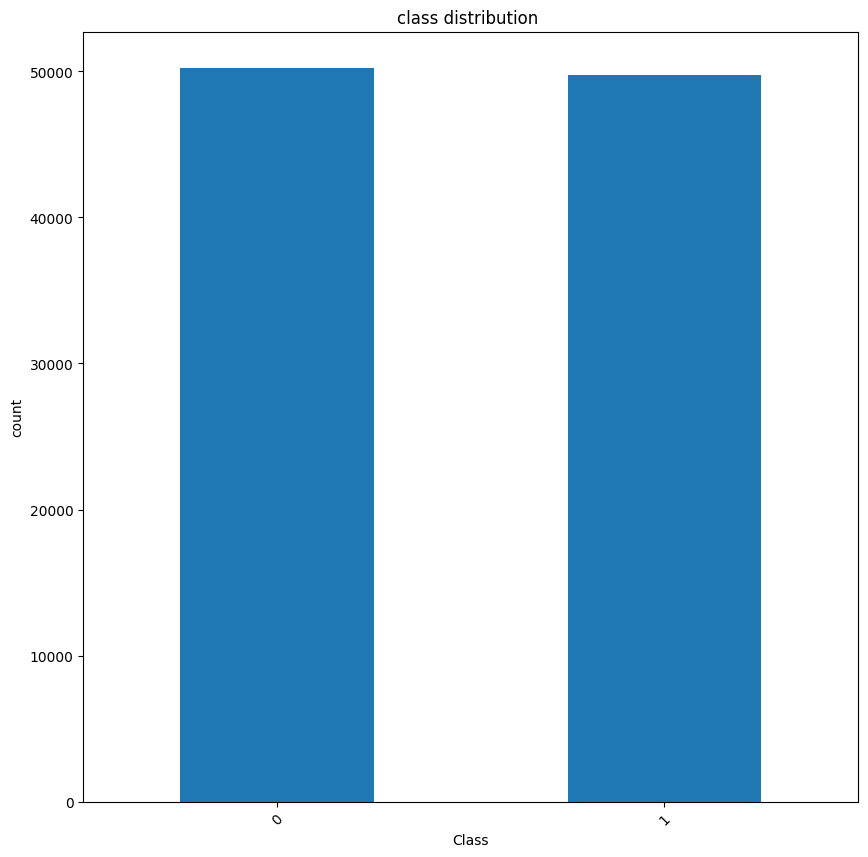

In [38]:
plt.figure(figsize=(10,10))
class_count.plot(kind='bar')
plt.title('class distribution ')
plt.xlabel('Class')
plt.ylabel('count')
plt.xticks(rotation=45)


#### the churn variable almost evenly distributed, which means their is no problem of class imbalanced

# Feature Selection using Random Forest importance method 

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(x_train[:30000], y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.301736
1,Total_Usage_GB,0.282418
2,Age,0.197292
3,Subscription_Length_Months,0.147800
4,Gender_Male,0.021552
5,Location_New York,0.012858
6,Location_Los Angeles,0.012704
7,Location_Houston,0.012384
8,Location_Miami,0.011256


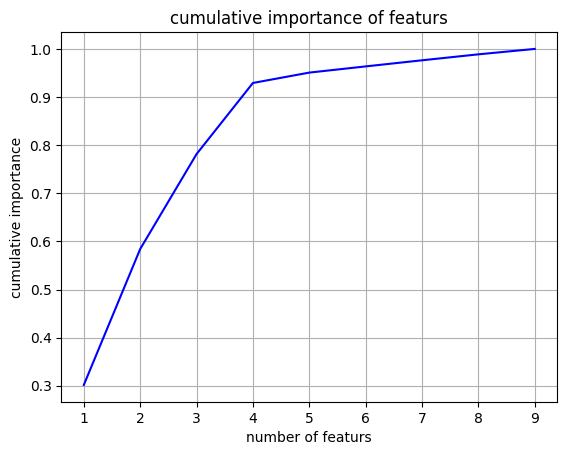

In [40]:
# check optimal number of features 

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances)+1),cumulative_importance, 'b-')
plt.xlabel('number of featurs')
plt.ylabel('cumulative importance')
plt.title("cumulative importance of featurs")
plt.grid(True)
plt.show()

#### The graph shows that only 4 variables are important for the analysis. These variables are:

* Monthly bill

* Total usage in GB

* Age

* Subscription length in months

* These 4 variables together account for approximately 94% of the importance for the analysis. This means that they are the most important variables to consider when trying to predict customer churn.

* Here, I will use all the variables for analysis because there are not many variables. If the model does not perform well or overfits, I will remove variables and build a model on the features that contribute more to the model.

## Checking multy colinearity between variables
* In machine learning, it is important to check if there are variables that are highly correlated with each other. This is called multicollinearity.

In [44]:
# checking multiccolinearity of x_train_resample

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =pd.DataFrame()
vif['variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range (x_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,variable,VIF
2,Monthly_Bill,3.340229
3,Total_Usage_GB,3.304982
0,Age,3.252427
1,Subscription_Length_Months,3.152641
4,Gender_Male,1.880472
7,Location_Miami,1.729954
5,Location_Houston,1.728491
6,Location_Los Angeles,1.718256
8,Location_New York,1.715994


##### The training data does not contain multicollinearity because all of the variables have a VIF value less than 5

## Model Building : Maachine Leaarning Algorithm

In [45]:
# importing algorithms, metrics and time 

import time 

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
algorithms = []